In [1]:
# Import required modules
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
import math

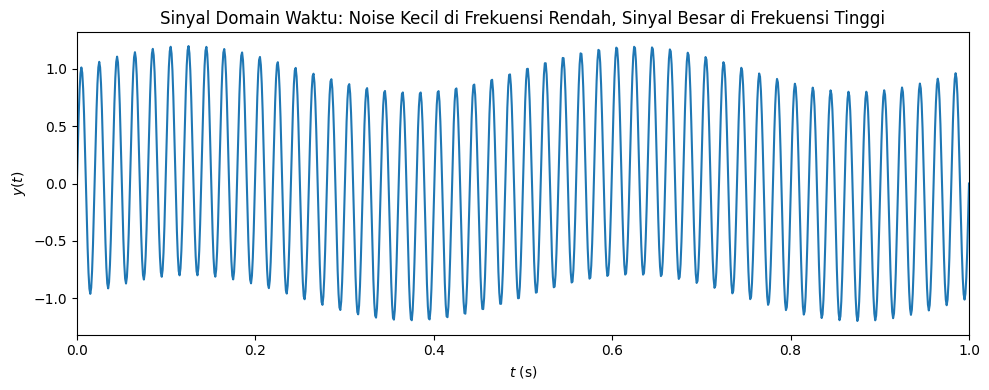

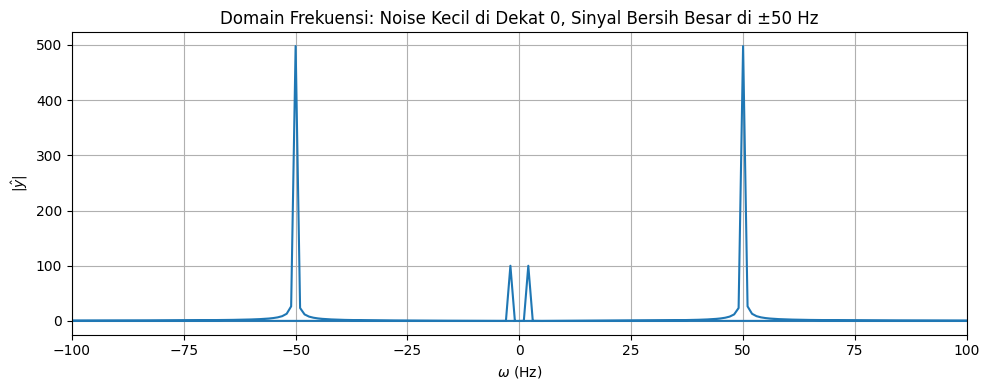

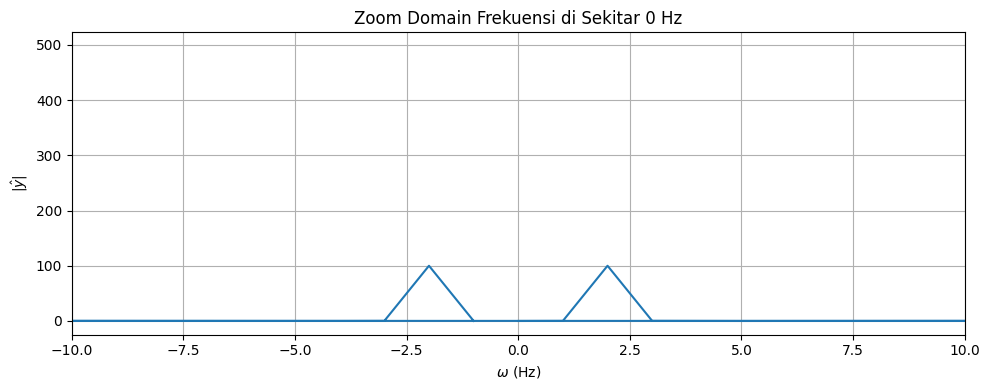

In [50]:
import numpy as np
import math
import matplotlib.pyplot as plt

# Pembangkitan Sinyal dengan pembalikan magnitudo
samplingFreq = 1000  # Sampling pada frekuensi 1 kHz
tlims = [0, 1]        # Batas waktu dalam detik
signalFreq = [2, 50]  # Frekuensi sinyal: [frekuensi noise, frekuensi sinyal bersih]

# PERUBAHAN PENTING: Balikkan magnitudo - sinyal bersih besar di frekuensi tinggi
signalMag = [0.2, 1]  # Noise kecil di 2Hz, sinyal bersih besar di 50Hz

t = np.linspace(tlims[0], tlims[1], (tlims[1] - tlims[0]) * samplingFreq)

# Bangun sinyal dengan magnitudo terbalik
y = signalMag[0] * np.sin(2 * math.pi * signalFreq[0] * t) + \
    signalMag[1] * np.sin(2 * math.pi * signalFreq[1] * t)

# Plot Sinyal Domain Waktu
plt.figure(figsize=(10, 4))
plt.plot(t, y)
plt.ylabel("$y(t)$")
plt.xlabel("$t$ (s)")
plt.xlim([min(t), max(t)])
plt.title("Sinyal Domain Waktu: Noise Kecil di Frekuensi Rendah, Sinyal Besar di Frekuensi Tinggi")
plt.tight_layout()
plt.show()

# Transformasi Fourier
yhat = np.fft.fft(y)
fcycles = np.fft.fftfreq(len(t), d=1.0 / samplingFreq)  # Frekuensi dalam Hz

# Plot Sinyal Domain Frekuensi
plt.figure(figsize=(10, 4))
plt.plot(fcycles, np.absolute(yhat))
plt.xlim([-100, 100])
plt.xlabel("$\omega$ (Hz)")
plt.ylabel("$|\hat{y}|$")
plt.title("Domain Frekuensi: Noise Kecil di Dekat 0, Sinyal Bersih Besar di ±50 Hz")
plt.grid(True)
plt.tight_layout()
plt.show()

# Untuk memperjelas, kita zoom di sekitar frekuensi 0
plt.figure(figsize=(10, 4))
plt.plot(fcycles, np.absolute(yhat))
plt.xlim([-10, 10])  # Zoom di sekitar frekuensi 0
plt.xlabel("$\omega$ (Hz)")
plt.ylabel("$|\hat{y}|$")
plt.title("Zoom Domain Frekuensi di Sekitar 0 Hz")
plt.grid(True)
plt.tight_layout()
plt.show()

<ipython-input-57-c3130de50cbb>:130: UserWarning: The filter's denominator is extremely small at frequencies [0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.003, 0.003, 0.003, 0.003, 0.003, 0.003, 0.003, 0.003, 0.003, 0.003, 0.003, 0.003, 0.003, 0.003, 0.003, 0.003, 0.003, 0.003, 0.003, 0.003, 0.004, 0.004, 0.004, 0.004, 0.004, 0.004, 0.004, 0.004, 0.004, 0.004, 0.004, 0.004, 0.004, 0.004, 0.004, 0.004, 0.004, 0.005, 0.005, 0.005, 0.005], around which a singularity may be present
  w_gd, gd = signal.group_delay((b, a), w=np.logspace(-3, 0, 1000))


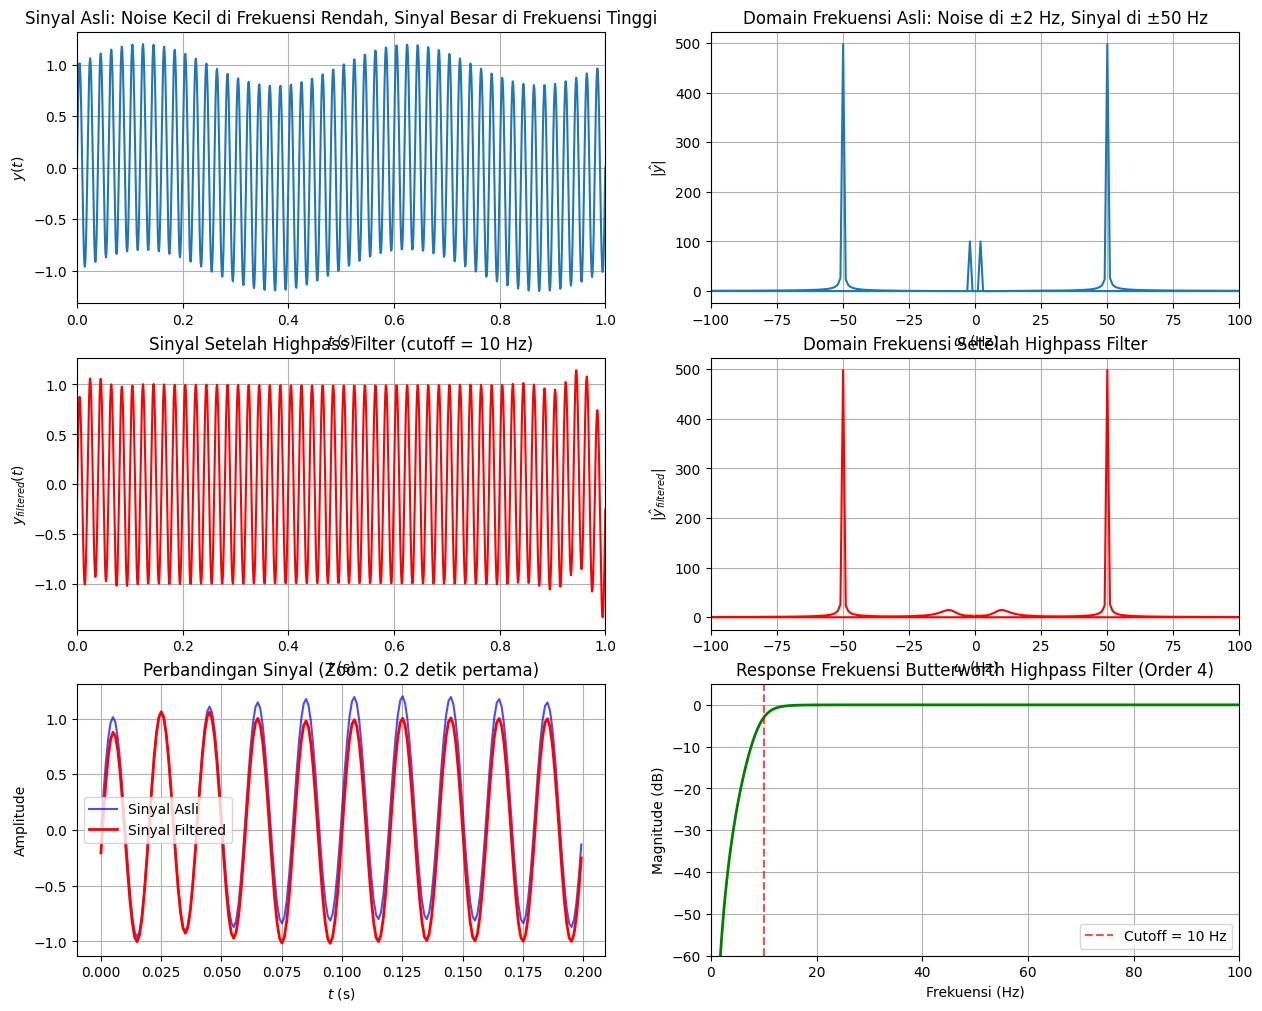

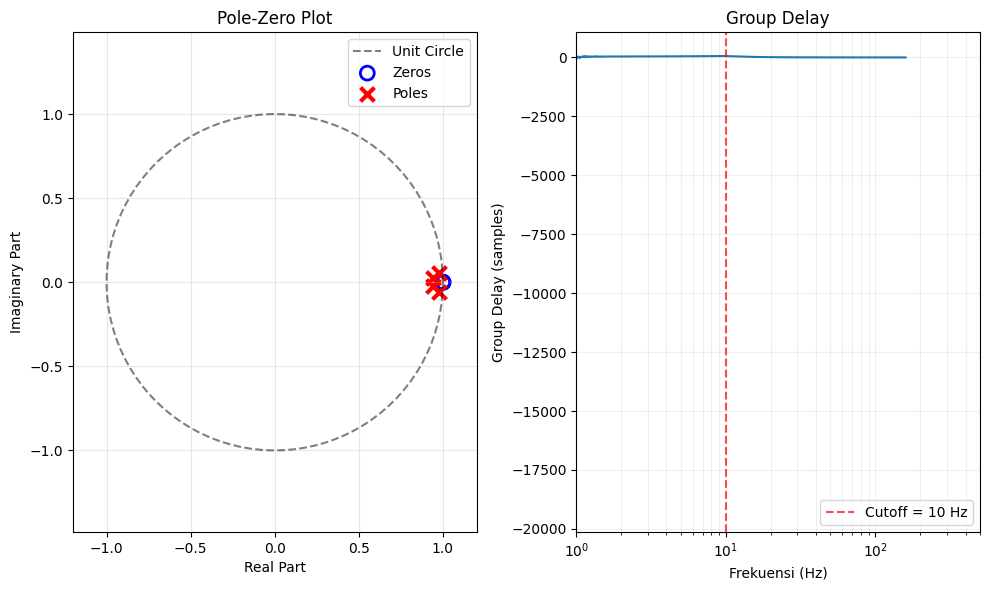

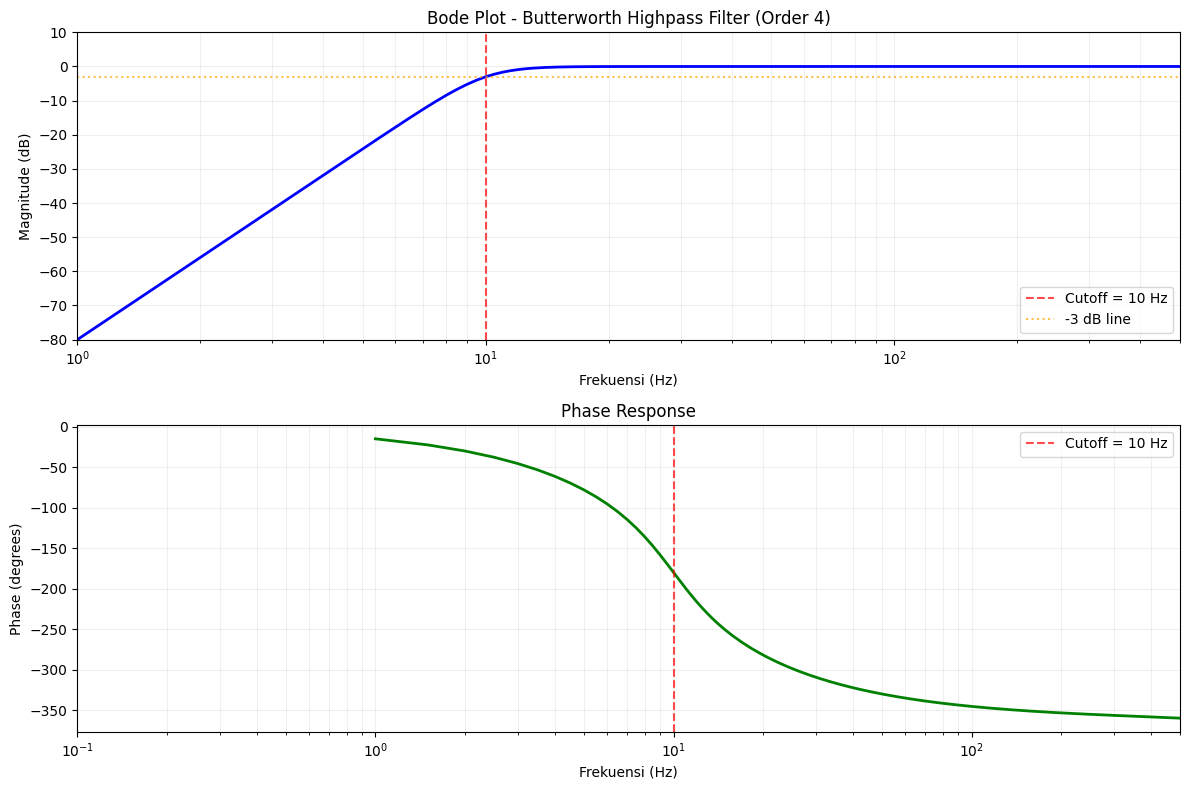

=== ANALISIS HASIL FILTERING ===
Frekuensi sampling: 1000 Hz
Frekuensi cutoff filter: 10 Hz
Order filter: 4
Frekuensi noise: 2 Hz (magnitudo asli: 0.2)
Frekuensi sinyal: 50 Hz (magnitudo asli: 1)

=== KOEFISIEN BUTTERWORTH HIGHPASS FILTER ===
Order Filter: 4
Cutoff Frequency: 10 Hz
Normalized Cutoff: 0.0200

Koefisien Numerator (b):
  b[0] = 0.92117099
  b[1] = -3.68468397
  b[2] = 5.52702596
  b[3] = -3.68468397
  b[4] = 0.92117099

Koefisien Denominator (a):
  a[0] = 1.00000000
  a[1] = -3.83582554
  a[2] = 5.52081914
  a[3] = -3.53353522
  a[4] = 0.84855600

=== TRANSFER FUNCTION ===
H(z) = (b[0] + b[1]*z^-1 + b[2]*z^-2 + ... + b[n]*z^-n) / (a[0] + a[1]*z^-1 + a[2]*z^-2 + ... + a[n]*z^-n)

=== POLE-ZERO ANALYSIS ===
Gain: 0.92117099

Zeros:
  z[0] = 1.000203
  z[1] = 1.000000 + 0.000203j
  z[2] = 1.000000 + -0.000203j
  z[3] = 0.999797

Poles:
  p[0] = 0.974608 + 0.056650j
  p[1] = 0.974608 + -0.056650j
  p[2] = 0.943305 + 0.022711j
  p[3] = 0.943305 + -0.022711j

=== ANALISIS STABI

In [57]:
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy import signal

# Pembangkitan Sinyal dengan pembalikan magnitudo
samplingFreq = 1000  # Sampling pada frekuensi 1 kHz
tlims = [0, 1]        # Batas waktu dalam detik
signalFreq = [2, 50]  # Frekuensi sinyal: [frekuensi noise, frekuensi sinyal bersih]

# PERUBAHAN PENTING: Balikkan magnitudo - sinyal bersih besar di frekuensi tinggi
signalMag = [0.2, 1]  # Noise kecil di 2Hz, sinyal bersih besar di 50Hz

t = np.linspace(tlims[0], tlims[1], (tlims[1] - tlims[0]) * samplingFreq)

# Bangun sinyal dengan magnitudo terbalik
y = signalMag[0] * np.sin(2 * math.pi * signalFreq[0] * t) + \
    signalMag[1] * np.sin(2 * math.pi * signalFreq[1] * t)

# Plot Sinyal Domain Waktu - Original
plt.figure(figsize=(15, 12))

plt.subplot(3, 2, 1)
plt.plot(t, y)
plt.ylabel("$y(t)$")
plt.xlabel("$t$ (s)")
plt.xlim([min(t), max(t)])
plt.title("Sinyal Asli: Noise Kecil di Frekuensi Rendah, Sinyal Besar di Frekuensi Tinggi")
plt.grid(True)

# Transformasi Fourier - Original
yhat = np.fft.fft(y)
fcycles = np.fft.fftfreq(len(t), d=1.0 / samplingFreq)  # Frekuensi dalam Hz

# Plot Sinyal Domain Frekuensi - Original
plt.subplot(3, 2, 2)
plt.plot(fcycles, np.absolute(yhat))
plt.xlim([-100, 100])
plt.xlabel("$\omega$ (Hz)")
plt.ylabel("$|\hat{y}|$")
plt.title("Domain Frekuensi Asli: Noise di ±2 Hz, Sinyal di ±50 Hz")
plt.grid(True)

# IMPLEMENTASI HIGHPASS BUTTERWORTH FILTER
# Parameter filter
cutoff_freq = 10  # Frekuensi cutoff dalam Hz (antara noise 2Hz dan sinyal 50Hz)
filter_order = 4  # Order filter (semakin tinggi, semakin tajam)

# Normalisasi frekuensi cutoff (Nyquist frequency = samplingFreq/2)
nyquist_freq = samplingFreq / 2
normalized_cutoff = cutoff_freq / nyquist_freq

# Desain Butterworth highpass filter
b, a = signal.butter(filter_order, normalized_cutoff, btype='high', analog=False)

# Terapkan filter pada sinyal
y_filtered = signal.filtfilt(b, a, y)  # filtfilt untuk zero-phase filtering

# Plot hasil filtering dalam domain waktu
plt.subplot(3, 2, 3)
plt.plot(t, y_filtered, 'r-', linewidth=1.5)
plt.ylabel("$y_{filtered}(t)$")
plt.xlabel("$t$ (s)")
plt.xlim([min(t), max(t)])
plt.title(f"Sinyal Setelah Highpass Filter (cutoff = {cutoff_freq} Hz)")
plt.grid(True)

# FFT dari sinyal yang telah difilter
yhat_filtered = np.fft.fft(y_filtered)

# Plot domain frekuensi setelah filtering
plt.subplot(3, 2, 4)
plt.plot(fcycles, np.absolute(yhat_filtered), 'r-', linewidth=1.5)
plt.xlim([-100, 100])
plt.xlabel("$\omega$ (Hz)")
plt.ylabel("$|\hat{y}_{filtered}|$")
plt.title("Domain Frekuensi Setelah Highpass Filter")
plt.grid(True)

# Perbandingan sinyal asli vs filtered
plt.subplot(3, 2, 5)
plt.plot(t[:200], y[:200], 'b-', label='Sinyal Asli', alpha=0.7)
plt.plot(t[:200], y_filtered[:200], 'r-', label='Sinyal Filtered', linewidth=2)
plt.ylabel("Amplitude")
plt.xlabel("$t$ (s)")
plt.title("Perbandingan Sinyal (Zoom: 0.2 detik pertama)")
plt.legend()
plt.grid(True)

# Response frekuensi dari filter
w, h = signal.freqz(b, a, worN=8000)
frequencies = w * samplingFreq / (2 * np.pi)

plt.subplot(3, 2, 6)
plt.plot(frequencies, 20 * np.log10(abs(h)), 'g-', linewidth=2)
plt.axvline(cutoff_freq, color='r', linestyle='--', alpha=0.7, label=f'Cutoff = {cutoff_freq} Hz')
plt.xlabel('Frekuensi (Hz)')
plt.ylabel('Magnitude (dB)')
plt.title(f'Response Frekuensi Butterworth Highpass Filter (Order {filter_order})')
plt.xlim([0, 100])
plt.ylim([-60, 5])
plt.grid(True)
plt.legend()

# Pole-Zero Plot
plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
# Plot unit circle
theta = np.linspace(0, 2*np.pi, 100)
plt.plot(np.cos(theta), np.sin(theta), 'k--', alpha=0.5, label='Unit Circle')

# Plot poles and zeros
plt.scatter(zeros.real, zeros.imag, marker='o', s=100, facecolors='none',
           edgecolors='blue', linewidth=2, label='Zeros')
plt.scatter(poles.real, poles.imag, marker='x', s=100, color='red',
           linewidth=3, label='Poles')

plt.xlabel('Real Part')
plt.ylabel('Imaginary Part')
plt.title('Pole-Zero Plot')
plt.grid(True, alpha=0.3)
plt.axis('equal')
plt.legend()
plt.xlim([-1.2, 1.2])
plt.ylim([-1.2, 1.2])

# Group delay
plt.subplot(1, 2, 2)
w_gd, gd = signal.group_delay((b, a), w=np.logspace(-3, 0, 1000))
frequencies_gd = w_gd * samplingFreq / (2 * np.pi)
plt.semilogx(frequencies_gd, gd)
plt.axvline(cutoff_freq, color='r', linestyle='--', alpha=0.7, label=f'Cutoff = {cutoff_freq} Hz')
plt.xlabel('Frekuensi (Hz)')
plt.ylabel('Group Delay (samples)')
plt.title('Group Delay')
plt.grid(True, which="both", ls="-", alpha=0.2)
plt.legend()
plt.xlim([1, samplingFreq/2])

plt.tight_layout()
plt.show()

# BODE PLOT (Magnitude dan Phase)
plt.figure(figsize=(12, 8))

# Hitung response frekuensi dengan range linear yang lebih aman
freq_range = np.linspace(1, samplingFreq/2, 1000)  # 1 Hz sampai Nyquist
w_bode = 2 * np.pi * freq_range / samplingFreq
h_bode = signal.freqz(b, a, worN=w_bode)[1]
frequencies_bode = freq_range

# Magnitude plot
plt.subplot(2, 1, 1)
plt.semilogx(frequencies_bode, 20 * np.log10(abs(h_bode)), 'b-', linewidth=2)
plt.axvline(cutoff_freq, color='r', linestyle='--', alpha=0.7, label=f'Cutoff = {cutoff_freq} Hz')
plt.axhline(-3, color='orange', linestyle=':', alpha=0.7, label='-3 dB line')
plt.xlabel('Frekuensi (Hz)')
plt.ylabel('Magnitude (dB)')
plt.title(f'Bode Plot - Butterworth Highpass Filter (Order {filter_order})')
plt.grid(True, which="both", ls="-", alpha=0.2)
plt.legend()
plt.xlim([1, samplingFreq/2])
plt.ylim([-80, 10])

# Phase plot
plt.subplot(2, 1, 2)
angles = np.unwrap(np.angle(h_bode))
plt.semilogx(frequencies_bode, np.degrees(angles), 'g-', linewidth=2)
plt.axvline(cutoff_freq, color='r', linestyle='--', alpha=0.7, label=f'Cutoff = {cutoff_freq} Hz')
plt.xlabel('Frekuensi (Hz)')
plt.ylabel('Phase (degrees)')
plt.title('Phase Response')
plt.grid(True, which="both", ls="-", alpha=0.2)
plt.legend()
plt.xlim([0.1, samplingFreq/2])

plt.tight_layout()
plt.show()

# Analisis hasil
print("=== ANALISIS HASIL FILTERING ===")
print(f"Frekuensi sampling: {samplingFreq} Hz")
print(f"Frekuensi cutoff filter: {cutoff_freq} Hz")
print(f"Order filter: {filter_order}")
print(f"Frekuensi noise: {signalFreq[0]} Hz (magnitudo asli: {signalMag[0]})")
print(f"Frekuensi sinyal: {signalFreq[1]} Hz (magnitudo asli: {signalMag[1]})")

# TAMPILKAN KOEFISIEN FILTER
print(f"\n=== KOEFISIEN BUTTERWORTH HIGHPASS FILTER ===")
print(f"Order Filter: {filter_order}")
print(f"Cutoff Frequency: {cutoff_freq} Hz")
print(f"Normalized Cutoff: {normalized_cutoff:.4f}")

print(f"\nKoefisien Numerator (b):")
for i, coeff in enumerate(b):
    print(f"  b[{i}] = {coeff:.8f}")

print(f"\nKoefisien Denominator (a):")
for i, coeff in enumerate(a):
    print(f"  a[{i}] = {coeff:.8f}")

# Transfer function dalam bentuk z-domain
print(f"\n=== TRANSFER FUNCTION ===")
print("H(z) = (b[0] + b[1]*z^-1 + b[2]*z^-2 + ... + b[n]*z^-n) / (a[0] + a[1]*z^-1 + a[2]*z^-2 + ... + a[n]*z^-n)")

# Pole dan Zero analysis
zeros, poles, gain = signal.tf2zpk(b, a)
print(f"\n=== POLE-ZERO ANALYSIS ===")
print(f"Gain: {gain:.8f}")
print(f"\nZeros:")
for i, zero in enumerate(zeros):
    if np.isreal(zero):
        print(f"  z[{i}] = {zero.real:.6f}")
    else:
        print(f"  z[{i}] = {zero.real:.6f} + {zero.imag:.6f}j")

print(f"\nPoles:")
for i, pole in enumerate(poles):
    if np.isreal(pole):
        print(f"  p[{i}] = {pole.real:.6f}")
    else:
        print(f"  p[{i}] = {pole.real:.6f} + {pole.imag:.6f}j")

# Stability analysis
pole_magnitudes = np.abs(poles)
is_stable = np.all(pole_magnitudes < 1.0)
print(f"\n=== ANALISIS STABILITAS ===")
print(f"Filter stabil: {'Ya' if is_stable else 'Tidak'}")
print(f"Magnitude poles maksimum: {np.max(pole_magnitudes):.6f}")

# Karakteristik filter pada frekuensi tertentu
freq_test = [1, 2, 5, 10, 20, 50, 100]
print(f"\n=== RESPONSE PADA FREKUENSI SPESIFIK ===")
for f in freq_test:
    if f <= samplingFreq/2:  # Hanya untuk frekuensi di bawah Nyquist
        w_test = 2 * np.pi * f / samplingFreq
        h_test = np.polyval(b, np.exp(-1j * w_test)) / np.polyval(a, np.exp(-1j * w_test))
        magnitude_db = 20 * np.log10(abs(h_test))
        phase_deg = np.degrees(np.angle(h_test))
        print(f"  {f:3d} Hz: {magnitude_db:+7.2f} dB, {phase_deg:+7.1f}°")

# Hitung power sinyal sebelum dan sesudah filtering
power_original = np.mean(y**2)
power_filtered = np.mean(y_filtered**2)
noise_reduction = (power_original - power_filtered) / power_original * 100

print(f"\nPower sinyal asli: {power_original:.4f}")
print(f"Power sinyal filtered: {power_filtered:.4f}")
print(f"Reduksi power (estimasi noise removal): {noise_reduction:.2f}%")

# Analisis spektrum untuk frekuensi spesifik
idx_2hz = np.argmin(np.abs(fcycles - 2))
idx_50hz = np.argmin(np.abs(fcycles - 50))

print(f"\nMagnitudo di 2 Hz:")
print(f"  Sebelum filtering: {np.abs(yhat[idx_2hz]):.2f}")
print(f"  Setelah filtering: {np.abs(yhat_filtered[idx_2hz]):.2f}")
print(f"  Reduksi: {(1 - np.abs(yhat_filtered[idx_2hz])/np.abs(yhat[idx_2hz]))*100:.1f}%")

print(f"\nMagnitudo di 50 Hz:")
print(f"  Sebelum filtering: {np.abs(yhat[idx_50hz]):.2f}")
print(f"  Setelah filtering: {np.abs(yhat_filtered[idx_50hz]):.2f}")
print(f"  Preservation: {(np.abs(yhat_filtered[idx_50hz])/np.abs(yhat[idx_50hz]))*100:.1f}%")